In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset 
beer = pd.read_csv('beers.csv')
beer

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [3]:
#dropping nan or missing values 
beer.dropna()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
14,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0
26,26,0.049,17.0,801,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0
27,27,0.049,17.0,800,21st Amendment Watermelon Wheat Beer (2006),Fruit / Vegetable Beer,368,12.0
28,28,0.070,70.0,799,21st Amendment IPA (2006),American IPA,368,12.0
29,29,0.070,70.0,797,Brew Free! or Die IPA (2008),American IPA,368,12.0
30,30,0.070,70.0,796,Brew Free! or Die IPA (2009),American IPA,368,12.0


        Unnamed: 0          abv          ibu           id   brewery_id  \
count  2410.000000  2348.000000  1405.000000  2410.000000  2410.000000   
mean   1204.500000     0.059773    42.713167  1431.113278   231.749793   
std     695.851397     0.013542    25.954066   752.459975   157.685604   
min       0.000000     0.001000     4.000000     1.000000     0.000000   
25%     602.250000     0.050000    21.000000   808.250000    93.000000   
50%    1204.500000     0.056000    35.000000  1453.500000   205.000000   
75%    1806.750000     0.067000    64.000000  2075.750000   366.000000   
max    2409.000000     0.128000   138.000000  2692.000000   557.000000   

            ounces  
count  2410.000000  
mean     13.592241  
std       2.352204  
min       8.400000  
25%      12.000000  
50%      12.000000  
75%      16.000000  
max      32.000000  
            Unnamed: 0       abv       ibu        id  brewery_id    ounces
Unnamed: 0    1.000000  0.006547  0.019885 -0.077488   -0.012088  0.0

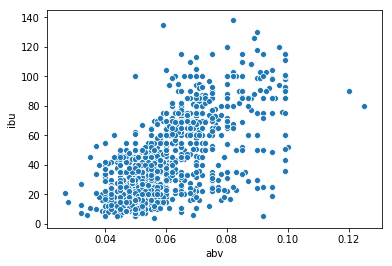

In [4]:
# Exploring the data
print(beer.describe())
correlation_matrix = beer.corr()
print(correlation_matrix)
print(sns.scatterplot(x=beer['abv'], y=beer['ibu']))


In [5]:
# setting prediction target
# The goal is to predict beer style from abv(alcohol content) and ibu (bitterness units)
Y = beer['style']
beer = beer.drop('style', 1)
beer_style = pd.get_dummies(Y)



In [9]:
# Reducing to most useful features, abv and ibu
beer = beer.drop('Unnamed: 0', 1)
beer = beer.drop('id', 1)
beer = beer.drop('brewery_id', 1)
beer = beer.drop('ounces', 1)



In [10]:
beer.dropna()

,abv,ibu
14,0.061,60.0
21,0.099,92.0
22,0.079,45.0
24,0.044,42.0
25,0.049,17.0
26,0.049,17.0
27,0.049,17.0
28,0.070,70.0
29,0.070,70.0
30,0.070,70.0


In [11]:
beer_style.dropna()

,Abbey Single Ale,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,...,Schwarzbier,Scotch Ale / Wee Heavy,Scottish Ale,Shandy,Smoked Beer,Tripel,Vienna Lager,Wheat Ale,Winter Warmer,Witbier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#beer = beer.reset_index()
#beer_style = beer_style.reset_index()


In [12]:
beer.dtypes

abv    float64
ibu    float64
dtype: object

In [16]:
# Trouble with fixing error 


# Decision tree model and graphics
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# Initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=2,
    random_state = 1000
)
decision_tree.fit(beer, beer_style)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=beer.columns,
    class_names= beer_style,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').